<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Final_Code_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:-** More specifically, we are working with a Car Sale Adverts dataset provided by AutoTrader(one of the industry partners). The dataset contains an anonymised collection of adverts with information on vehicles such as brand, type, colour, mileage, as well as the selling price.  Need to
perform a structured set of tasks with the ultimate goal of learning about associations and group differences that have a significant effect on the valuation of vehicles.

Below steps are performed :-

1. **Exploratory Data Analysis**

2. **Data Preprocessing**

3. **Association and Group Differences**

4. **Model Implemetation**

# **Exploratory Data Analysis**

**Importing Standard Python Libraries**

In [1]:
import pandas as pd
# Pandas library used for data analysis and manipulation
import numpy as np #Numpy library used for Mathematical operations
#Seaborn and Matplotlib libraries are used for plotting
import seaborn as sns   
import matplotlib.pyplot as plt

**Loading and reading dataset using pandas library**

In [2]:
car_dataset = pd.read_csv('adverts.csv')
car_dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [3]:
car_dataset.shape

(402005, 12)

In [4]:
#car_dataset = car_dataset.dropna()

In [5]:
import pandas as pd
# Dataframe
car_dataset = car_dataset[car_dataset['reg_code'].str.contains('[a-zA-Z]') == False]

In [6]:
car_dataset.shape

(367233, 12)

In [7]:
car_dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol


In [8]:
car_dataset.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [9]:
car_dataset.shape

(367233, 12)

In [10]:
car_dataset["reg_code"] = car_dataset["reg_code"].astype(int)

<ipython-input-10-85abd9b2c266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset["reg_code"] = car_dataset["reg_code"].astype(int)


In [11]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367233 entries, 1 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       367233 non-null  int64  
 1   mileage                367124 non-null  float64
 2   reg_code               367233 non-null  int64  
 3   standard_colour        363138 non-null  object 
 4   standard_make          367233 non-null  object 
 5   standard_model         367233 non-null  object 
 6   vehicle_condition      367233 non-null  object 
 7   year_of_registration   365542 non-null  float64
 8   price                  367233 non-null  int64  
 9   body_type              366579 non-null  object 
 10  crossover_car_and_van  367233 non-null  bool   
 11  fuel_type              366836 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 34.0+ MB


In [12]:
car_dataset.describe(include=[object])

,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,363138,367233,367233,367233,366579,366836
unique,22,95,944,1,16,9
top,Black,BMW,Golf,USED,Hatchback,Petrol
freq,80202,35441,10841,367233,155956,194671


**"crossover_car_and_van"** is a float value hence converted it in to integer

In [13]:
#car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(int)

**"Public_reference"** column is not having relation with any of the columns. Hence we are dropping it.

In [14]:
#car_dataset.drop("public_reference",axis=1,inplace=True)

In [15]:
car_dataset.describe() 

,public_reference,mileage,reg_code,year_of_registration,price
count,3.672330e+05,367124.000000,367233.000000,365542.000000,3.672330e+05
mean,2.020074e+14,40564.707137,40.437578,2015.181054,1.573444e+04
std,1.585118e+10,34094.158663,25.204174,7.704411,2.398606e+04
min,2.013072e+14,0.000000,2.000000,999.000000,1.800000e+02
25%,2.020090e+14,14333.000000,16.000000,2013.000000,7.000000e+03
50%,2.020100e+14,31531.000000,54.000000,2016.000000,1.190000e+04
75%,2.020102e+14,59316.000000,66.000000,2018.000000,1.850000e+04
max,2.020110e+14,999999.000000,95.000000,2020.000000,3.799995e+06


In [16]:
car_dataset.isnull().sum()

public_reference            0
mileage                   109
reg_code                    0
standard_colour          4095
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     1691
price                       0
body_type                 654
crossover_car_and_van       0
fuel_type                 397
dtype: int64

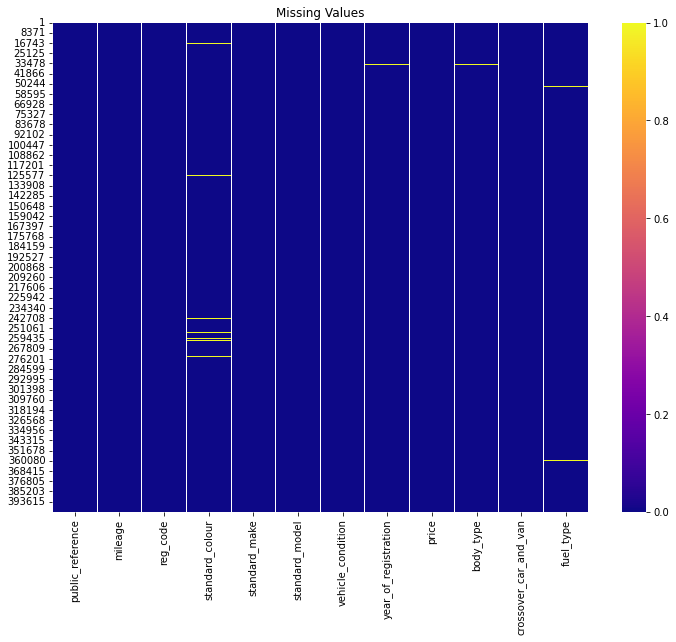

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9)) 
sns.heatmap(car_dataset.isna(), cmap='plasma')
plt.title("Missing Values") 
plt.show()

**Outliers**

*Explored the numerical data types found three* **attributes are effected by outliners** 

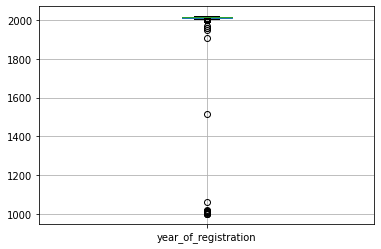

In [18]:
figure =car_dataset.boxplot('year_of_registration')

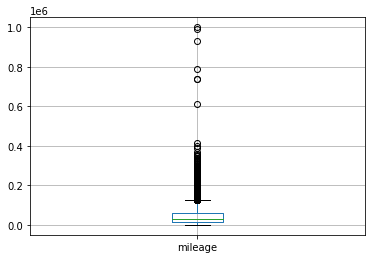

In [19]:
figure =car_dataset.boxplot('mileage')

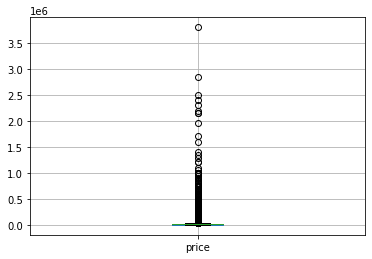

In [20]:
figure =car_dataset.boxplot('price')

In [21]:
#figure =car_dataset.boxplot('crossover_car_and_van')

**There were skewed values in the dataset**

In [22]:
car_dataset.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [23]:
car_dataset.skew()

<ipython-input-23-0629bea908e9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_dataset.skew()


public_reference        -12.320506
mileage                   1.464387
reg_code                 -0.026332
year_of_registration    -97.633679
price                    41.477460
crossover_car_and_van    14.998656
dtype: float64

# **Data Pre-Processing**

1.  Handling Outliers and Noise

2.  Dealing with Missing Values.

3.  Handling Skewness.

4.  Feature Engineering and Data Transformations.

5.  Subsetting (e.g., Feature Selection, Data Sampling)

In [24]:
#car = pd.DataFrame(car)
# using dropna() function 
car_dataset = car_dataset.dropna()

In [25]:
car_dataset["mileage"] = car_dataset["mileage"].astype(int)
car_dataset["year_of_registration"] = car_dataset["year_of_registration"].astype(int)

<ipython-input-25-f3bc7644c347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset["mileage"] = car_dataset["mileage"].astype(int)
<ipython-input-25-f3bc7644c347>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset["year_of_registration"] = car_dataset["year_of_registration"].astype(int)


In [26]:
car_dataset.dtypes

public_reference          int64
mileage                   int64
reg_code                  int64
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van      bool
fuel_type                object
dtype: object

In [27]:
car_dataset["reg_code"] = car_dataset["reg_code"].astype(int)

<ipython-input-27-85abd9b2c266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset["reg_code"] = car_dataset["reg_code"].astype(int)


In [28]:
car_dataset.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
#car_dataset = car_dataset.copy()
car_dataset['crossover_car_and_van'] = le.fit_transform(car_dataset[['crossover_car_and_van']])
#car_dataset['vehicle_condition'] = le.fit_transform(car_dataset[['vehicle_condition']])
car_dataset['fuel_type'] = le.fit_transform(car_dataset[['fuel_type']])
car_dataset['standard_colour'] = le.fit_transform(car_dataset[['standard_colour']])
car_dataset['body_type'] = le.fit_transform(car_dataset[['body_type']])
#car_dataset['body_type'] = le.fit_transform(car_dataset[['body_type']])
#car_dataset['vehicle_condition'] = le.fit_transform(car_dataset[['vehicle_condition']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(int)
#car_dataset["year_of_registration"] = car_dataset["year_of_registration"].astype(int)

In [31]:
car_dataset.dtypes

public_reference          int64
mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van     int64
fuel_type                 int64
dtype: object

In [32]:
car_dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230,61,2,Jaguar,XF,USED,2011,7000,14,0,1
2,202007020778474,7800,17,8,SKODA,Yeti,USED,2017,14000,13,0,6
3,202007080986776,45000,16,4,Vauxhall,Mokka,USED,2016,7995,7,0,1
4,202007161321269,64000,64,8,Land Rover,Range Rover Sport,USED,2015,26995,13,0,1
5,202009304412074,16000,17,2,Audi,S5,USED,2017,29000,4,0,6


In [33]:
car_dataset.dtypes

public_reference          int64
mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van     int64
fuel_type                 int64
dtype: object

In [34]:
car_dataset["mileage"] = car_dataset["mileage"].astype(int)
car_dataset["year_of_registration"] = car_dataset["year_of_registration"].astype(int)

In [35]:
car_dataset.dtypes

public_reference          int64
mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van     int64
fuel_type                 int64
dtype: object

**1. Handling Outliers**

In [36]:
car_dataset.head(20)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230,61,2,Jaguar,XF,USED,2011,7000,14,0,1
2,202007020778474,7800,17,8,SKODA,Yeti,USED,2017,14000,13,0,6
3,202007080986776,45000,16,4,Vauxhall,Mokka,USED,2016,7995,7,0,1
4,202007161321269,64000,64,8,Land Rover,Range Rover Sport,USED,2015,26995,13,0,1
5,202009304412074,16000,17,2,Audi,S5,USED,2017,29000,4,0,6
6,202007080998445,24075,17,17,Vauxhall,Viva,USED,2017,5861,7,0,6
7,202009244143980,99000,13,3,Land Rover,Range Rover,USED,2013,24475,13,0,1
8,202010014442611,111236,8,1,Mercedes-Benz,S Class,USED,2008,6995,8,0,1
9,202006230431327,9500,19,20,Land Rover,Range Rover,USED,2019,79995,13,0,1
10,202007151278313,77000,60,8,Volkswagen,Passat,USED,2010,4499,14,0,1


In [37]:
car_dataset['body_type'].unique()

array([14, 13,  7,  4,  8,  6,  9,  5, 12,  3, 11, 10, 15,  1,  0,  2])

In [38]:
def hapus_outliers(data, x):
    Q1 = data[x].quantile(0.30)
    Q3 = data[x].quantile(0.70)
    IQR = Q3 - Q1
    data = data[~((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR)))]
    return data

In [39]:
car_dataset = hapus_outliers (car_dataset,'price')
car_dataset = hapus_outliers (car_dataset,'year_of_registration')
car_dataset = hapus_outliers(car_dataset, 'mileage')
#car_dataset = hapus_outliers(car_dataset, 'crossover_car_and_van')
#car_dataset = hapus_outliers(car_dataset, 'vehicle_condition')

In [40]:
car_dataset.head(20)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,202007020778474,7800,17,8,SKODA,Yeti,USED,2017,14000,13,0,6
3,202007080986776,45000,16,4,Vauxhall,Mokka,USED,2016,7995,7,0,1
4,202007161321269,64000,64,8,Land Rover,Range Rover Sport,USED,2015,26995,13,0,1
5,202009304412074,16000,17,2,Audi,S5,USED,2017,29000,4,0,6
6,202007080998445,24075,17,17,Vauxhall,Viva,USED,2017,5861,7,0,6
10,202007151278313,77000,60,8,Volkswagen,Passat,USED,2010,4499,14,0,1
11,202007161303602,24487,17,1,Peugeot,208,USED,2017,8795,7,0,6
12,202009173867934,4765,69,20,SKODA,Octavia,USED,2019,16990,6,0,6
13,202009234108830,18214,19,18,SEAT,Leon,USED,2019,14290,7,0,6
14,202010014440649,31534,17,8,MINI,Hatch,USED,2017,19000,7,0,6


In [41]:
car_dataset.dtypes

public_reference          int64
mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van     int64
fuel_type                 int64
dtype: object

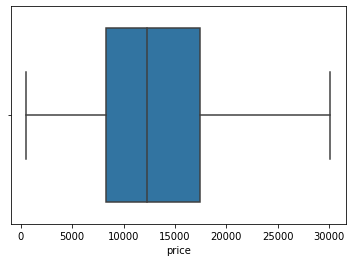

In [42]:
import seaborn as sns
sns.boxplot(x=car_dataset['price'])

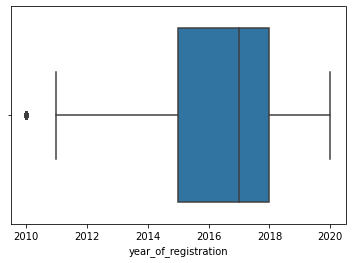

In [43]:
import seaborn as sns
sns.boxplot(x=car_dataset['year_of_registration'])

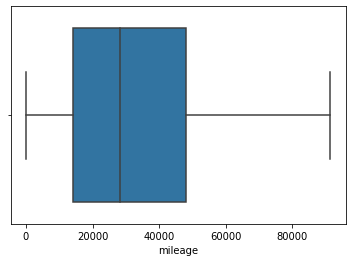

In [44]:
import seaborn as sns
sns.boxplot(x=car_dataset['mileage'])

**Outliers are treated and now exploreing the rest things**

**2. Dealing Missing Values**

After outliers are treated the count of missing values are reduced. Further will handle the missing values.

In [45]:
car_dataset.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

**Handling Skewed Data using BOX-COT transformation**

In [46]:
car_dataset.skew(axis = 0)

<ipython-input-46-30ecc9cf7310>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_dataset.skew(axis = 0)


public_reference        -12.275615
mileage                   0.633733
reg_code                 -0.015280
standard_colour           0.023985
year_of_registration     -0.621452
price                     0.597581
body_type                 0.420807
crossover_car_and_van    18.746862
fuel_type                -0.341849
dtype: float64

In [47]:
car_dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,202007020778474,7800,17,8,SKODA,Yeti,USED,2017,14000,13,0,6
3,202007080986776,45000,16,4,Vauxhall,Mokka,USED,2016,7995,7,0,1
4,202007161321269,64000,64,8,Land Rover,Range Rover Sport,USED,2015,26995,13,0,1
5,202009304412074,16000,17,2,Audi,S5,USED,2017,29000,4,0,6
6,202007080998445,24075,17,17,Vauxhall,Viva,USED,2017,5861,7,0,6


In [48]:
car_dataset.skew(axis = 0)

<ipython-input-48-30ecc9cf7310>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_dataset.skew(axis = 0)


public_reference        -12.275615
mileage                   0.633733
reg_code                 -0.015280
standard_colour           0.023985
year_of_registration     -0.621452
price                     0.597581
body_type                 0.420807
crossover_car_and_van    18.746862
fuel_type                -0.341849
dtype: float64

**No action is required in terms of Skewed Data**

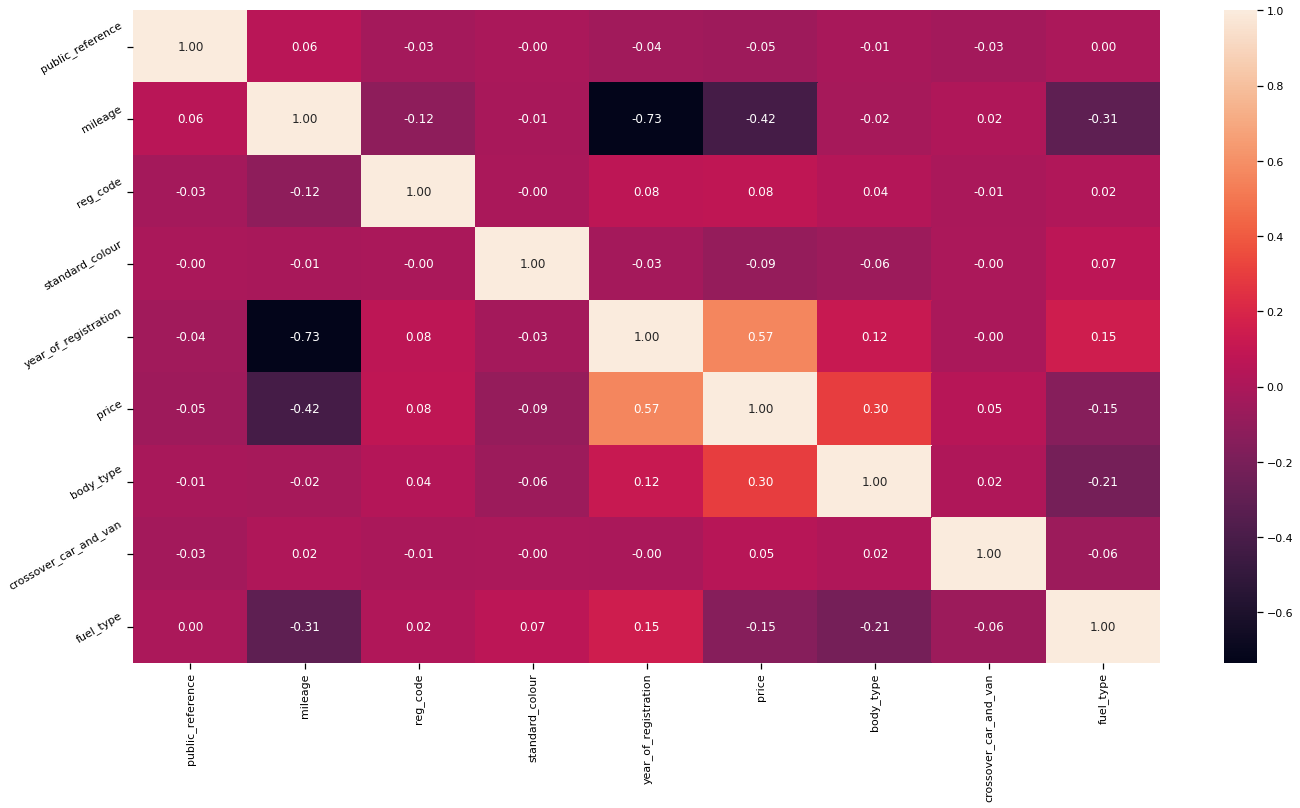

In [49]:
corr = car_dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(23,12))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
#car = pd.DataFrame(car)
# using dropna() function 
#car = car.dropna()

# **Association and Group Differences Analysis**

**Its not easy to understand the relationship between variables using the pairplot so we can check with the help of scatterplot.**

**Univariate Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


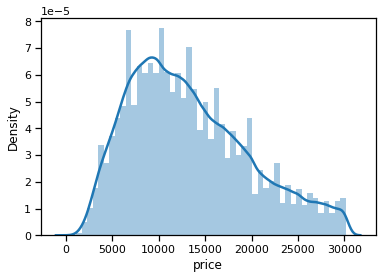

In [52]:
sns.distplot(car_dataset['price'])

**Fuel_type (vs) Price**

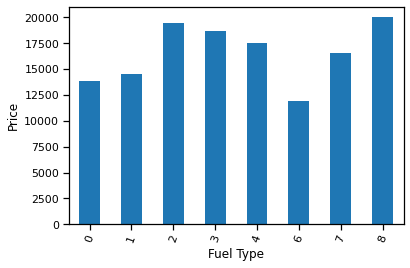

In [53]:
from matplotlib.pyplot import xticks
df_fuel_avg_price = car_dataset[['fuel_type','price']].groupby("fuel_type", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fuel_type', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Price")
xticks(rotation = 70)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


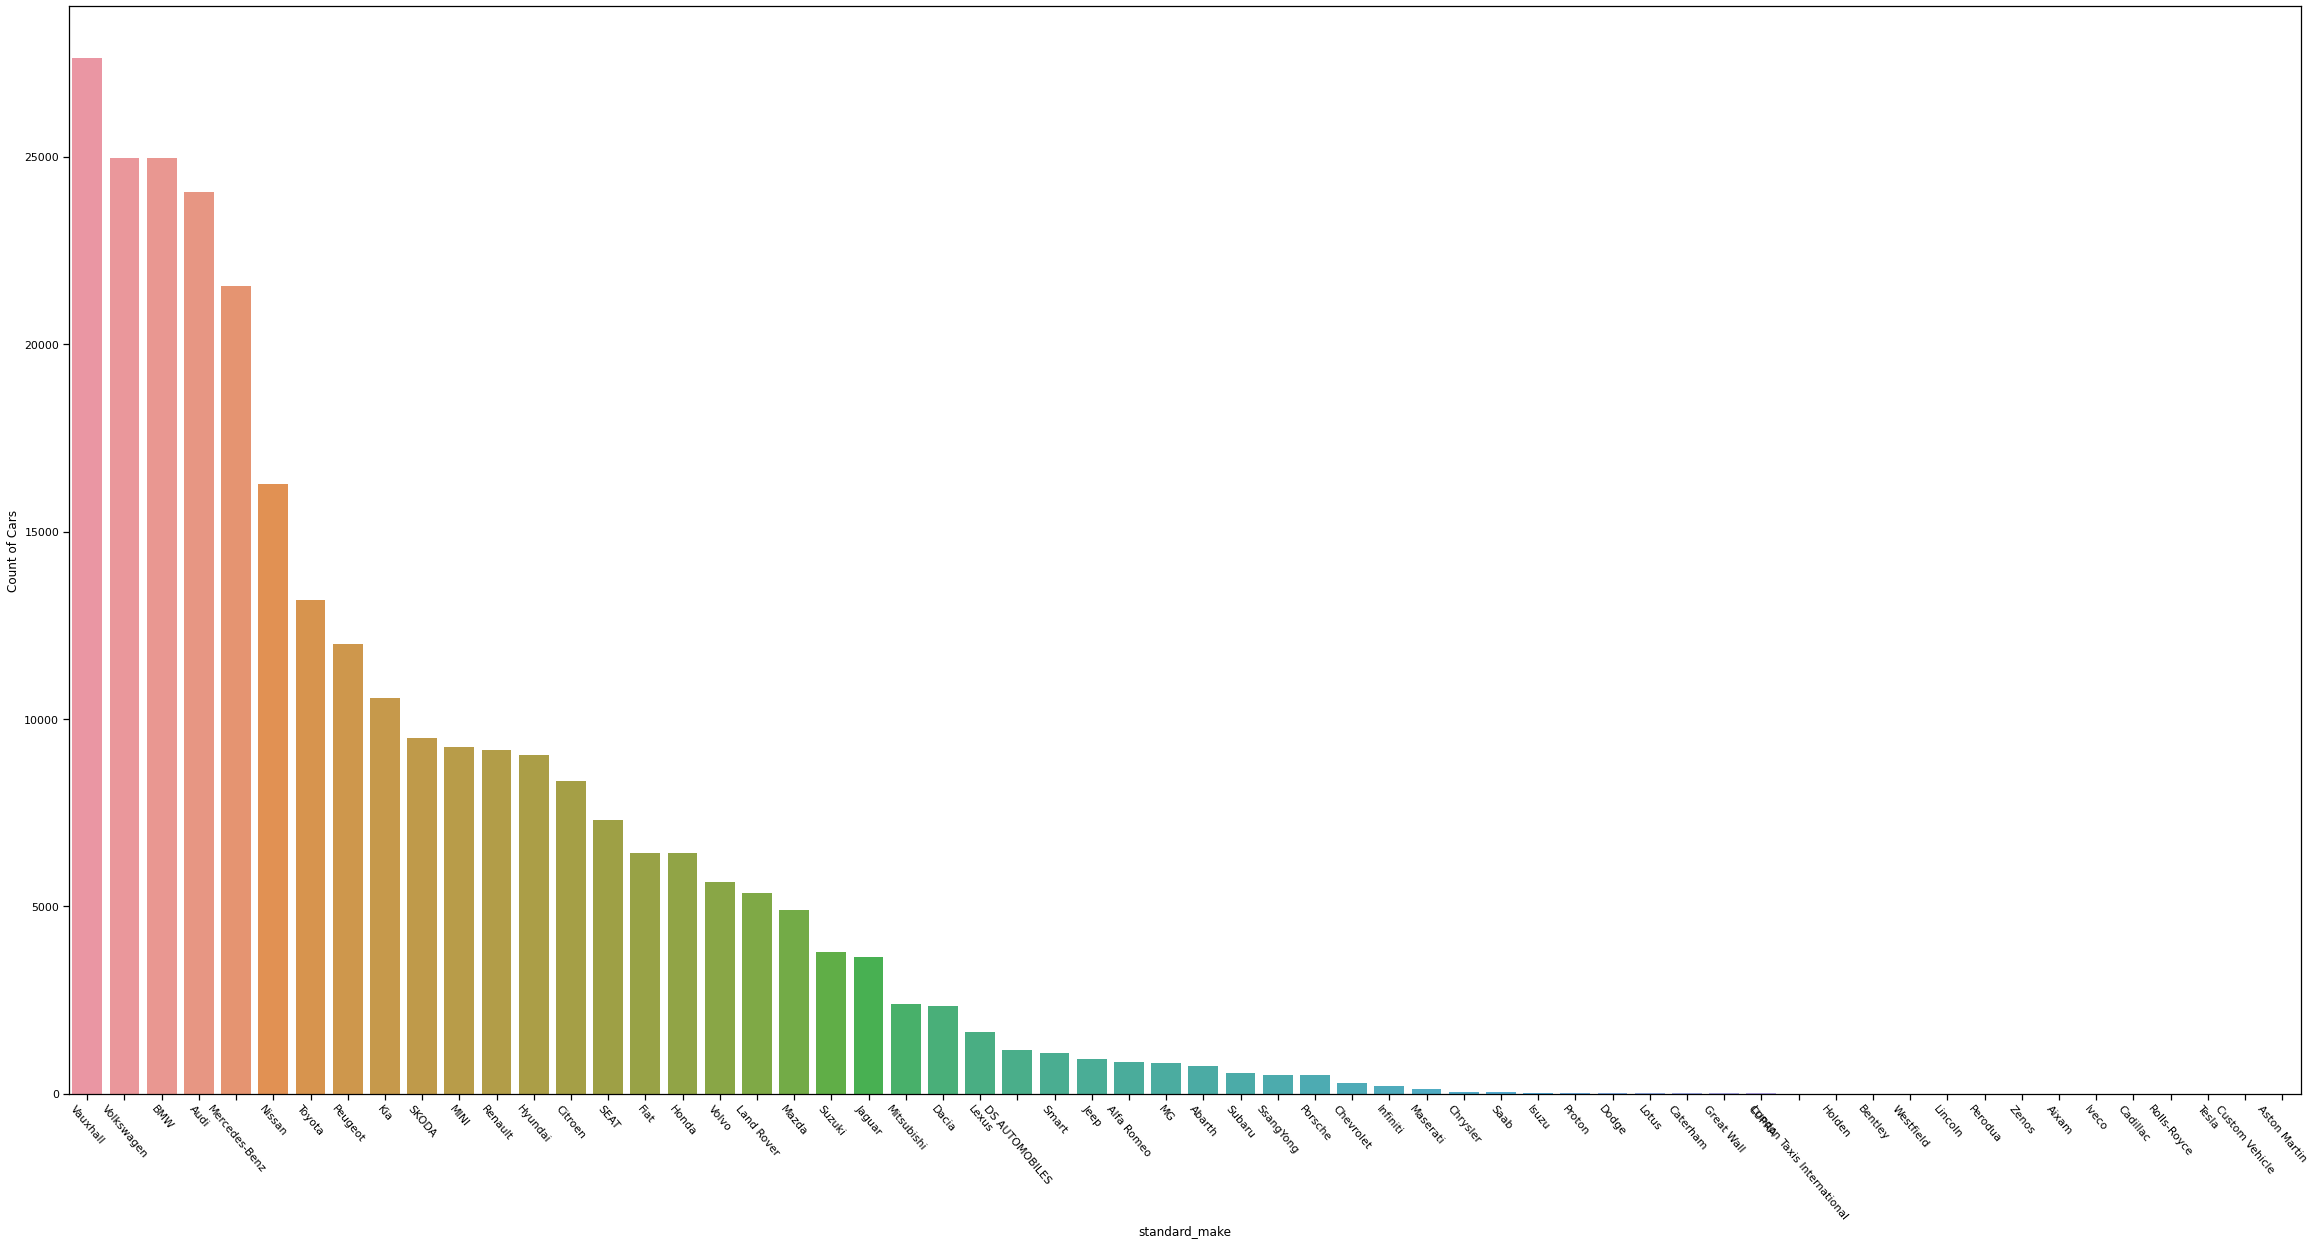

<Figure size 432x288 with 0 Axes>

In [54]:
fig, ax = plt.subplots(figsize = (40,20))
plt1 = sns.countplot(car_dataset['standard_make'], order=pd.value_counts(car_dataset['standard_make']).index,)
plt1.set(xlabel = 'standard_make', ylabel= 'Count of Cars')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

In [55]:
car_dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,202007020778474,7800,17,8,SKODA,Yeti,USED,2017,14000,13,0,6
3,202007080986776,45000,16,4,Vauxhall,Mokka,USED,2016,7995,7,0,1
4,202007161321269,64000,64,8,Land Rover,Range Rover Sport,USED,2015,26995,13,0,1
5,202009304412074,16000,17,2,Audi,S5,USED,2017,29000,4,0,6
6,202007080998445,24075,17,17,Vauxhall,Viva,USED,2017,5861,7,0,6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


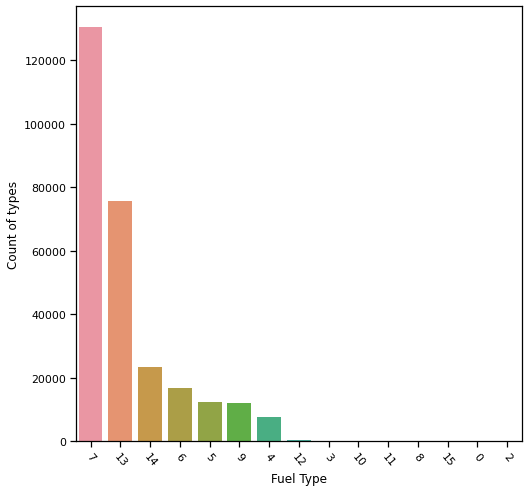

<Figure size 432x288 with 0 Axes>

In [56]:
fig, ax = plt.subplots(figsize = (8,8))
plt1 = sns.countplot(car_dataset['body_type'], order=pd.value_counts(car_dataset['body_type']).index,)
plt1.set(xlabel = 'Fuel Type', ylabel= 'Count of types')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


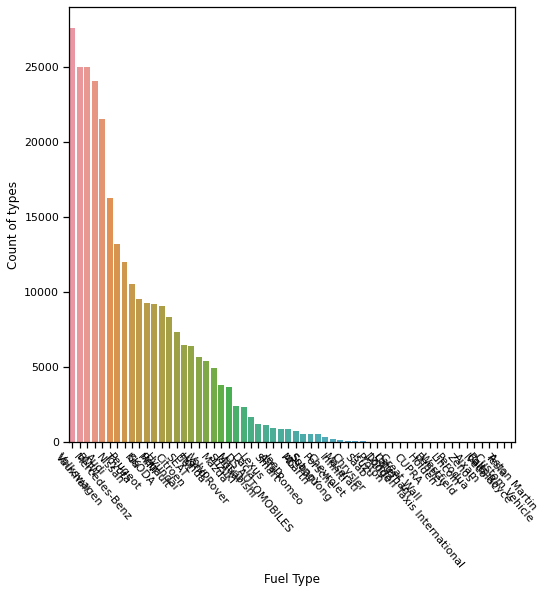

<Figure size 432x288 with 0 Axes>

In [57]:
fig, ax = plt.subplots(figsize = (8,8))
plt1 = sns.countplot(car_dataset['standard_make'], order=pd.value_counts(car_dataset['standard_make']).index,)
plt1.set(xlabel = 'Fuel Type', ylabel= 'Count of types')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


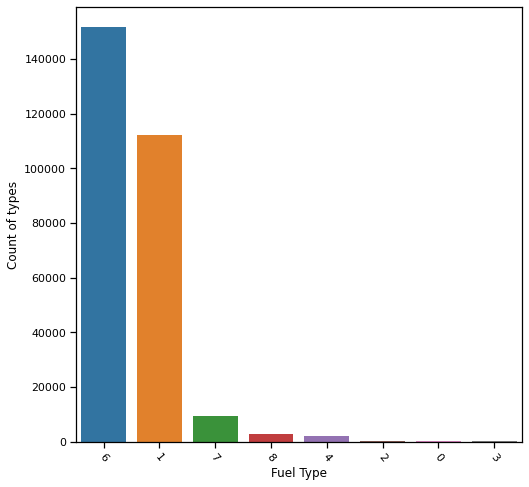

<Figure size 432x288 with 0 Axes>

In [58]:
fig, ax = plt.subplots(figsize = (8,8))
plt1 = sns.countplot(car_dataset['fuel_type'], order=pd.value_counts(car_dataset['fuel_type']).index,)
plt1.set(xlabel = 'Fuel Type', ylabel= 'Count of types')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

In [59]:
car_dataset.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


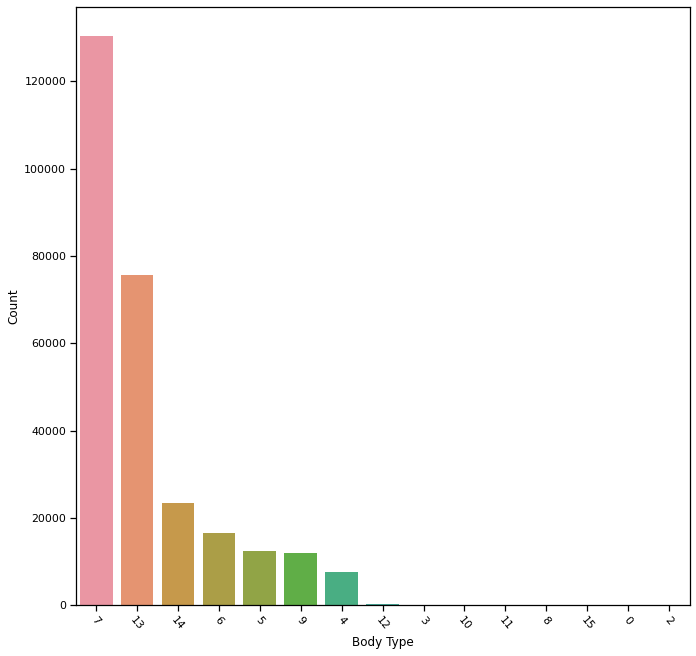

<Figure size 432x288 with 0 Axes>

In [60]:
fig, ax = plt.subplots(figsize = (11,11))
plt1 = sns.countplot(car_dataset['body_type'], order=pd.value_counts(car_dataset['body_type']).index,)
plt1.set(xlabel = 'Body Type', ylabel= 'Count')
xticks(rotation = 310)
plt.show()
plt.tight_layout()

In [61]:
car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(str)

In [62]:
car_dataset["mileage"] = car_dataset["mileage"].astype(int)
#car_dataset["year_of_registration"] = car_dataset["year_of_registration"].astype(int)

In [63]:
car_dataset.dtypes

public_reference          int64
mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van    object
fuel_type                 int64
dtype: object

**On the clean data using Klib python library have created a group categorical visuals**

In [64]:
df = pd.DataFrame(car_dataset)

In [65]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


GridSpec(6, 4)

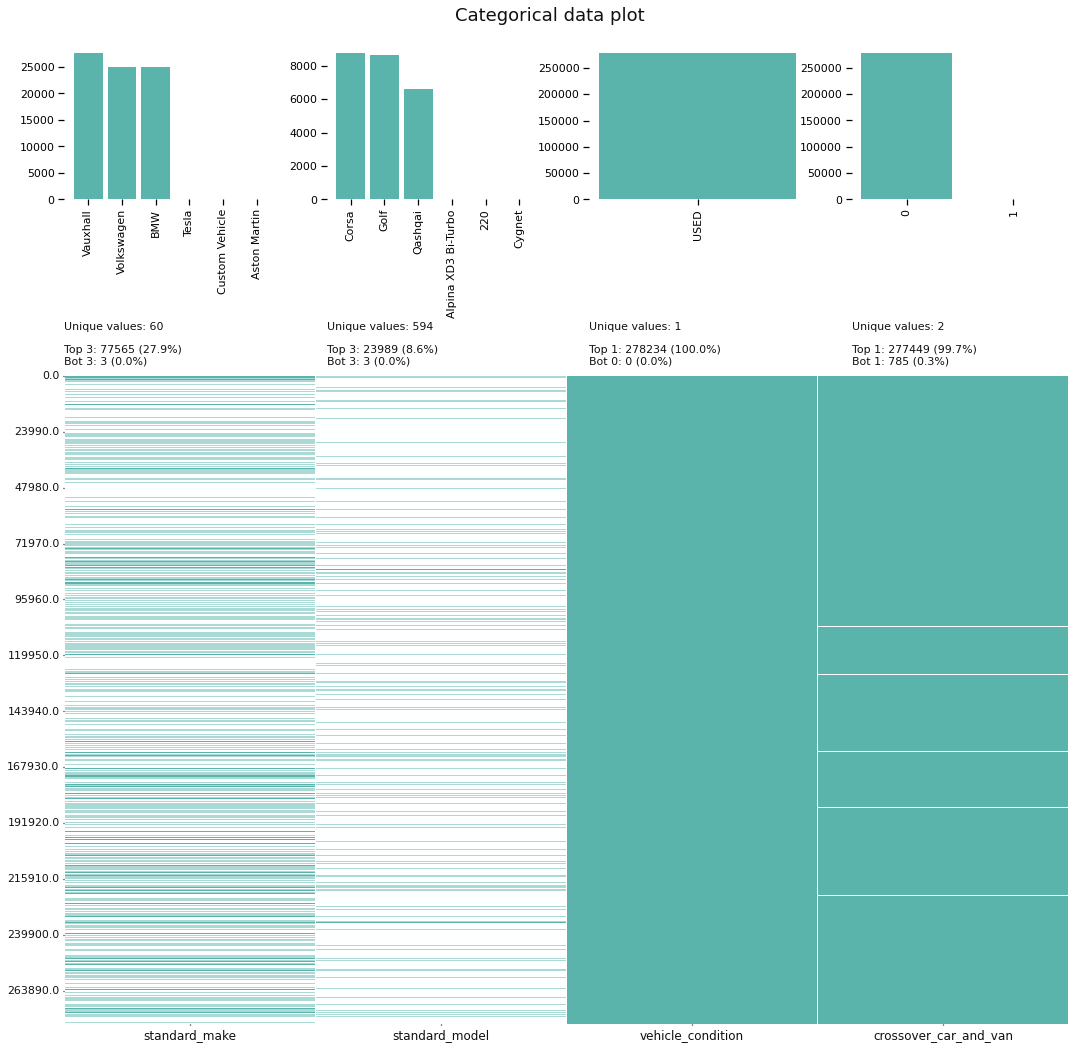

In [66]:
import klib
klib.cat_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1393: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.add_collection(LineCollection(
/usr/local/lib/python3.8/dist-packages/klib/describe.py:565: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  g.axes[0, 0].set_ylim(0)


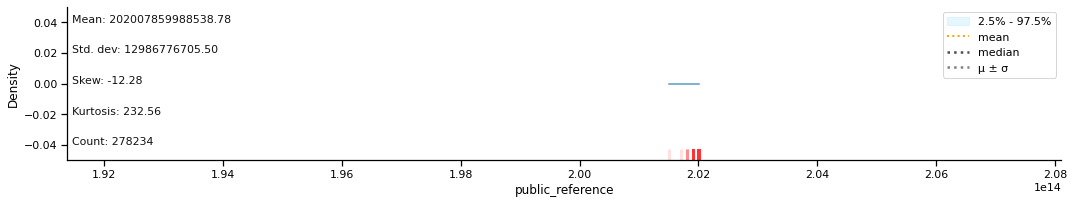

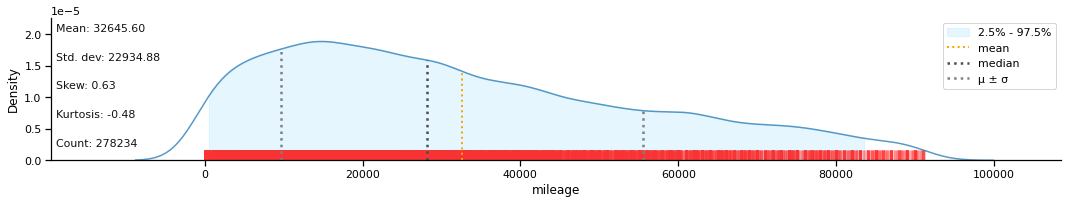

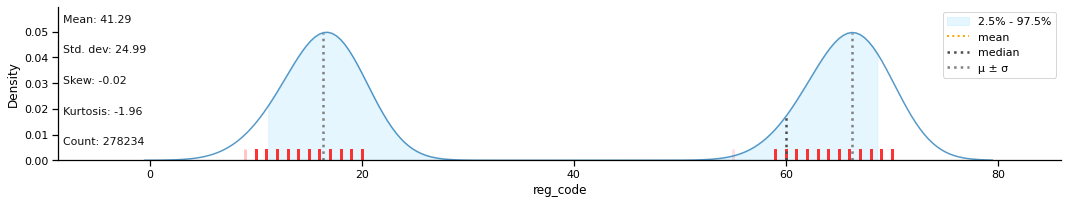

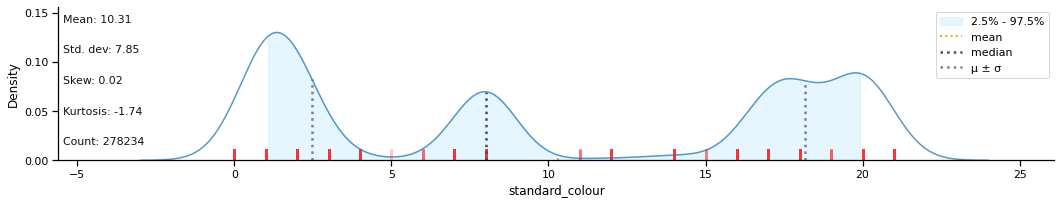

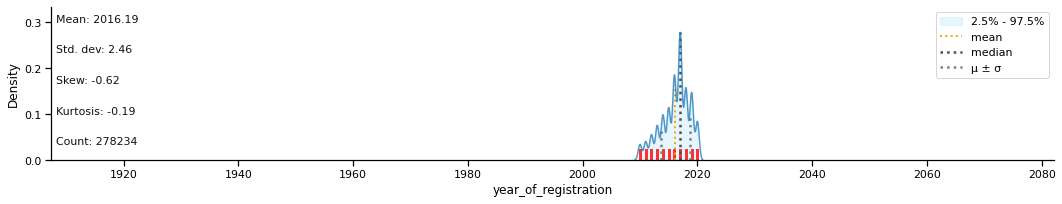

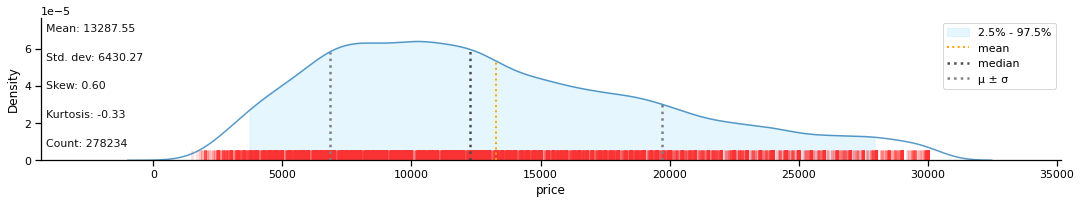

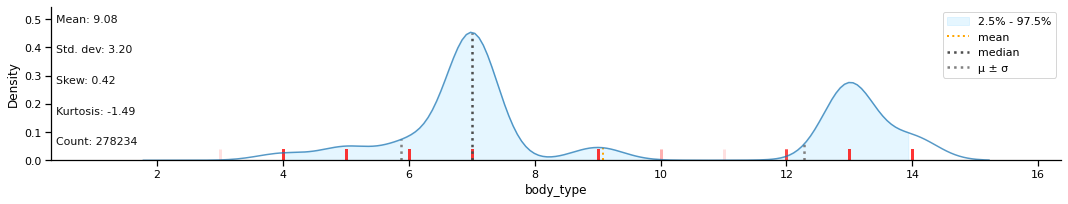

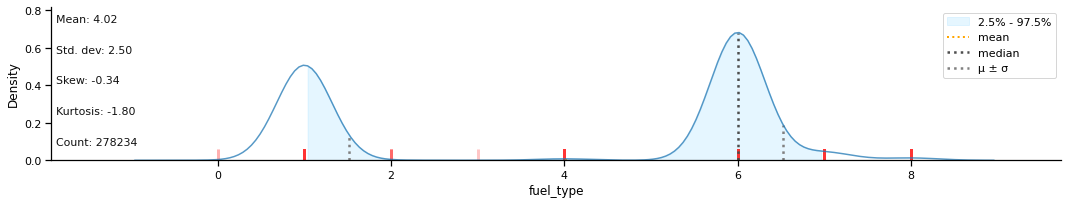

In [67]:
klib.dist_plot(df)

# **Model Implementation**

In [68]:
car_dataset.drop("public_reference",axis=1,inplace=True)

In [69]:
X=car_dataset.drop(columns='price')
y=car_dataset['price']

In [ ]:
X

In [ ]:
y

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [73]:
car_dataset.dtypes

mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van    object
fuel_type                 int64
dtype: object

In [74]:
ohe=OneHotEncoder()
ohe.fit(X[['standard_make','standard_model','vehicle_condition']])

OneHotEncoder()

In [75]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['standard_make','standard_model','vehicle_condition']),
                                    remainder='passthrough')

In [76]:
lr=LinearRegression()

In [77]:
car_dataset.dtypes

mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van    object
fuel_type                 int64
dtype: object

In [78]:
pipe=make_pipeline(column_trans,lr)

In [79]:
car_dataset.dtypes

mileage                   int64
reg_code                  int64
standard_colour           int64
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                 int64
crossover_car_and_van    object
fuel_type                 int64
dtype: object

In [80]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Abarth', 'Aixam', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW',
       'Bentley', 'CUPRA', 'Cadillac', 'Caterham', 'Chevrolet',
       'Chrysler', 'Citroen', 'Custom Vehicle', 'DS AUTOMOBILES', 'Dacia',
       'Dodge', 'Fiat', 'Great Wall', 'Holden', 'H...
       'XK', 'XKR', 'XV', 'Xsara Picasso', 'Yaris', 'Yeti', 'Ypsilon',
       'Z4', 'Zafira', 'Zafira Tourer', 'Zoe', 'e-NV200', 'forfour',
       'fortwo', 'i-MiEV', 'i10', 'i20', 'i3', 'i30', 'i40', 'i800',
       'iOn', 'iQ', 'ix20', 'ix35', 'quattro', 'up!'], dtype=object),
                                                                            array(['USED'], dtype=object)]),
                                                  ['standard_make',
                                       

In [81]:
y_pred=pipe.predict(X_test)

In [82]:
r2_score(y_test,y_pred)

0.8598623466967452